Regression equation: BMI = 47.95 + -0.28 * Height + 0.35 * Weight


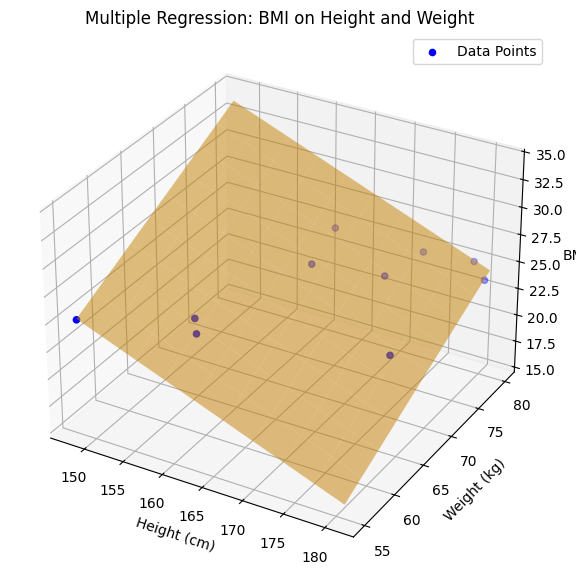

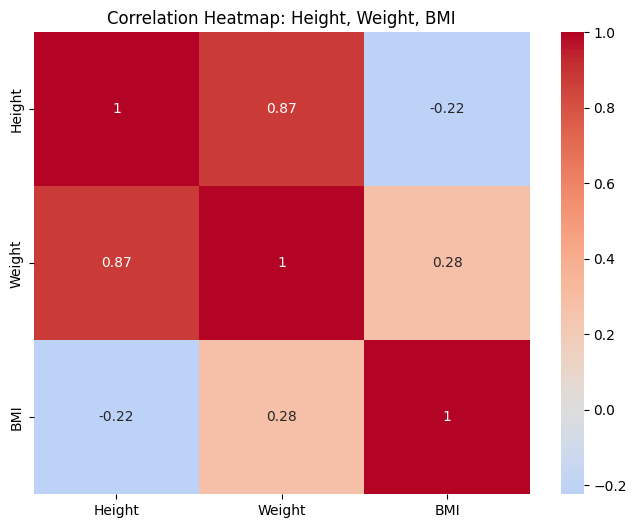

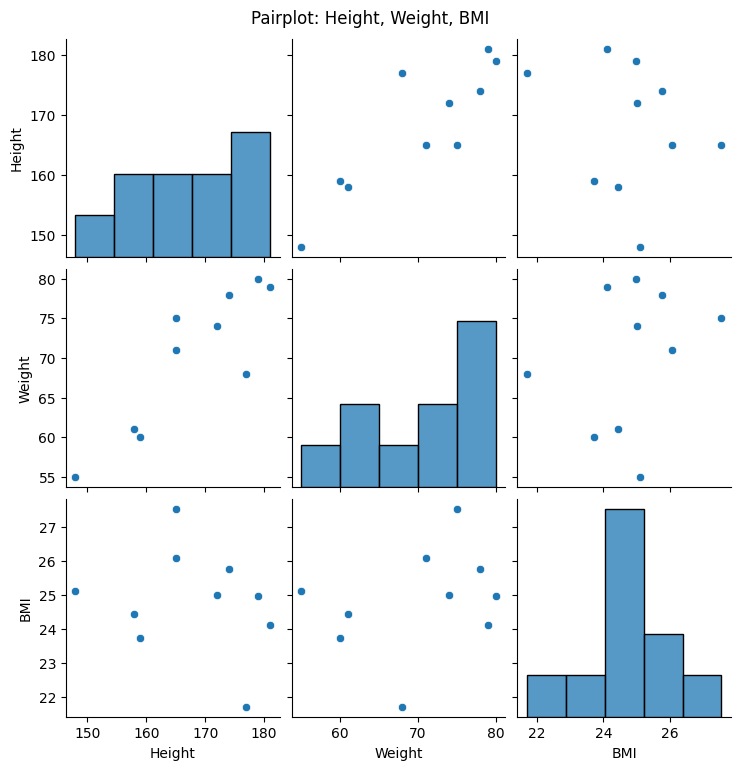

In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns


heights = []
weights = []
count = 0
with open("/home/student/Downloads/health_fitness_data.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if count < 10:
            heights.append(float(row["Height_cm"]))
            weights.append(float(row["Weight_kg"]))
            count += 1
        else:
            break


bmi = [w / ((h / 100) ** 2) for h, w in zip(heights, weights)]
n = len(heights)


X = np.column_stack((np.ones(n), heights, weights))
Y = np.array(bmi)

coeffs = np.linalg.inv(X.T @ X) @ (X.T @ Y)
b0, b1, b2 = coeffs

print(f"Regression equation: BMI = {b0:.2f} + {b1:.2f} * Height + {b2:.2f} * Weight")


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(heights, weights, bmi, color='blue', label='Data Points')


height_range = np.linspace(min(heights), max(heights), 10)
weight_range = np.linspace(min(weights), max(weights), 10)
H, W = np.meshgrid(height_range, weight_range)
B = b0 + b1 * H + b2 * W

ax.plot_surface(H, W, B, color='orange', alpha=0.5)

ax.set_xlabel("Height (cm)")
ax.set_ylabel("Weight (kg)")
ax.set_zlabel("BMI")
ax.set_title("Multiple Regression: BMI on Height and Weight")
ax.legend()

plt.show()

df = pd.DataFrame({
    "Height": heights,
    "Weight": weights,
    "BMI": bmi
})
corr = df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap: Height, Weight, BMI")
plt.show()


sns.pairplot(df)
plt.suptitle("Pairplot: Height, Weight, BMI", y=1.02)
plt.show()
